[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


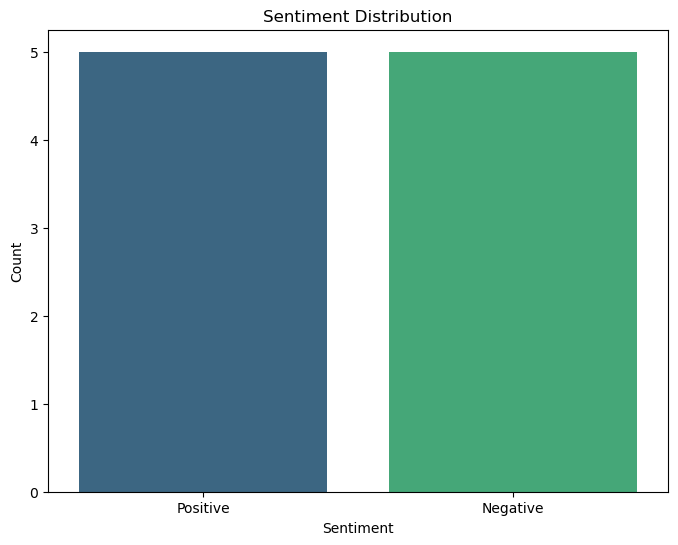

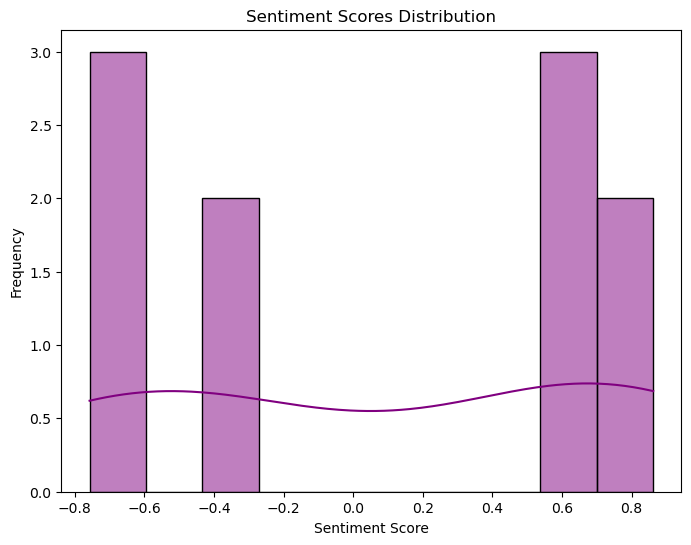

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure the VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Step 1: Generate a random dataset or load a pre-existing one
data = {
    'text': [
        "I love this product! It's amazing!",
        "This service is terrible. I'm very disappointed.",
        "It's okay, not the best, but not the worst either.",
        "I'm extremely happy with the quality!",
        "This is the worst experience I've ever had.",
        "Amazing! Will definitely recommend to others.",
        "Not great, but could be worse.",
        "Absolutely fantastic! Exceeded my expectations.",
        "I'm not satisfied with this at all.",
        "It's decent, nothing special though."
    ]
}

df = pd.DataFrame(data)

# Step 2: Sentiment Analysis
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each text entry
df['sentiment'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Step 3: Classify sentiment into positive, neutral, and negative
# Fix the classification using conditional statements
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

# Step 4: Visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Step 5: Visualize Sentiment Scores
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=10, kde=True, color='purple')
plt.title('Sentiment Scores Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()
